# Import stock data from tiingo website

In [2]:
import pandas_datareader as pdr

In [4]:
key = ''

In [5]:
# load data
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [2]:
# save data into our device
df.to_csv('AAPL.csv')

# Read csv data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-24 00:00:00+00:00,103.12,108.80,92.00,94.870,162206292,95.280906,100.529118,85.006239,87.658064,162206292,0.0,1.0
1,AAPL,2015-08-25 00:00:00+00:00,103.74,111.11,103.50,111.110,103601599,95.853775,102.663514,95.632019,102.663514,103601599,0.0,1.0
2,AAPL,2015-08-26 00:00:00+00:00,109.69,109.89,105.05,107.085,96774611,101.351461,101.536257,97.064189,98.944491,96774611,0.0,1.0
3,AAPL,2015-08-27 00:00:00+00:00,112.92,113.24,110.02,112.250,84616056,104.335919,104.631593,101.656374,103.716852,84616056,0.0,1.0
4,AAPL,2015-08-28 00:00:00+00:00,113.29,113.31,111.54,112.170,53164407,104.677792,104.696271,103.060825,103.642933,53164407,0.0,1.0


# Create working data of close stock price

In [3]:
df1 = data.reset_index()['close']
df1

0       103.12
1       103.74
2       109.69
3       112.92
4       113.29
         ...  
1253    459.63
1254    458.43
1255    462.25
1256    462.83
1257    473.10
Name: close, Length: 1258, dtype: float64

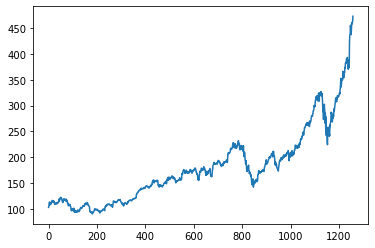

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

# Normalization

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [7]:
print(df1.shape)
df1

(1258, 1)


array([[0.03338907],
       [0.03500888],
       [0.05055387],
       ...,
       [0.97165326],
       [0.97316857],
       [1.        ]])

In [8]:
# creating training and test data

training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size

train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

In [9]:
training_size, test_size

(880, 378)

# Creating sequence data for training

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [12]:
x_train.shape, y_train.shape, x_test.shape

((779, 100), (779,), (277, 100))

In [13]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [14]:
x_train.shape, x_test.shape

((779, 100, 1), (277, 100, 1))

# Create the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [18]:
model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          epochs = 100,
          batch_size = 64,
          verbose = 1)

Epoch 1/100
13/13 [==============================] - 1s 88ms/step - loss: 0.0070 - val_loss: 0.0618
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0017 - val_loss: 0.0111
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 6.4542e-04 - val_loss: 0.0047
Epoch 4/100
13/13 [==============================] - 0s 17ms/step - loss: 4.3736e-04 - val_loss: 0.0065
Epoch 5/100
13/13 [==============================] - 0s 17ms/step - loss: 3.8690e-04 - val_loss: 0.0050
Epoch 6/100
13/13 [==============================] - 0s 17ms/step - loss: 3.6491e-04 - val_loss: 0.0053
Epoch 7/100
13/13 [==============================] - 0s 17ms/step - loss: 3.5515e-04 - val_loss: 0.0057
Epoch 8/100
13/13 [==============================] - 0s 17ms/step - loss: 3.3434e-04 - val_loss: 0.0055
Epoch 9/100
13/13 [==============================] - 0s 17ms/step - loss: 3.2251e-04 - val_loss: 0.0064
Epoch 10/100
13/13 [==============================] - 0s 17ms/step - los

13/13 [==============================] - 0s 17ms/step - loss: 1.2606e-04 - val_loss: 7.9624e-04
Epoch 79/100
13/13 [==============================] - 0s 17ms/step - loss: 1.1803e-04 - val_loss: 8.0936e-04
Epoch 80/100
13/13 [==============================] - 0s 17ms/step - loss: 1.3253e-04 - val_loss: 0.0010
Epoch 81/100
13/13 [==============================] - 0s 17ms/step - loss: 1.3565e-04 - val_loss: 7.7811e-04
Epoch 82/100
13/13 [==============================] - 0s 17ms/step - loss: 1.1518e-04 - val_loss: 9.4998e-04
Epoch 83/100
13/13 [==============================] - 0s 17ms/step - loss: 1.1599e-04 - val_loss: 0.0012
Epoch 84/100
13/13 [==============================] - 0s 17ms/step - loss: 1.1249e-04 - val_loss: 8.2757e-04
Epoch 85/100
13/13 [==============================] - 0s 17ms/step - loss: 1.1376e-04 - val_loss: 7.5555e-04
Epoch 86/100
13/13 [==============================] - 0s 17ms/step - loss: 1.2895e-04 - val_loss: 0.0012
Epoch 87/100
13/13 [========================

# Plot the loss

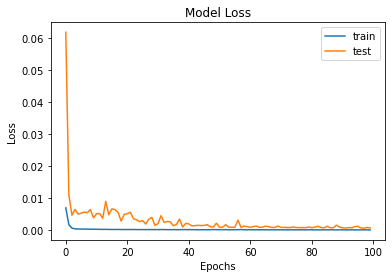

In [19]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

# Prediction

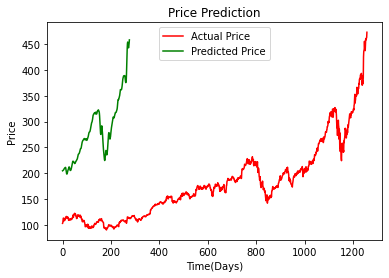

In [21]:
y_pred = model.predict(x_test)

y_test_inverse = scaler.inverse_transform(df1)
y_pred_inverse = scaler.inverse_transform(y_pred)

plt.plot(y_test_inverse, label = 'Actual Price', color = 'red')
plt.plot(y_pred_inverse, label = 'Predicted Price', color = 'green')

plt.title('Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('Price')
plt.legend(loc = 'best')
plt.show()

In [55]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [56]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [57]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

154.98889700646836

In [58]:
math.sqrt(mean_squared_error(y_test, test_predict))

286.901379122783

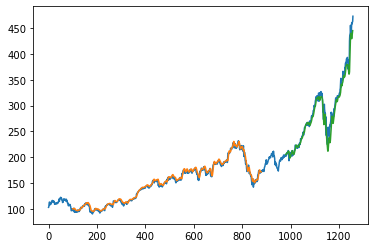

In [60]:
look_back = 100 # shift train prediction for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test pridiction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+look_back*2+1:len(df1)-1, :] = test_predict

# plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()